In [1]:
import os
import requests
import json
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import pandas as pd
from dotenv import load_dotenv


load_dotenv()

# Load API key from .env file
trafikverket_api_key = os.getenv("TRAFIKVERKET_API_KEY")

In [2]:
kamera_ids = [
    #"SE_STA_CAMERA_Orion_575", # Tpl Linvävartorpet Södra
    "SE_STA_CAMERA_Pacific_590", # Tpl Haga Södra
    "SE_STA_CAMERA_Orion_364", # Norrtull mot E4
    "SE_STA_CAMERA_Orion_308", # Sveavägen norrut
    "SE_STA_CAMERA_Orion_310" # Sveavägen söderut
]

kamera_ids = ", ".join(kamera_ids)
kamera_ids

'SE_STA_CAMERA_Pacific_590, SE_STA_CAMERA_Orion_364, SE_STA_CAMERA_Orion_308, SE_STA_CAMERA_Orion_310'

In [3]:
# Query med Id-filter för att ta ut specifik kamera

URL = r"https://api.trafikinfo.trafikverket.se/v2/data.json"

XML = f"""\
<REQUEST>
    <LOGIN authenticationkey="{trafikverket_api_key}" />
    <QUERY objecttype="Camera" schemaversion="1" limit="10">
    <FILTER>
        <IN name="Id" value="{kamera_ids}" />
    </FILTER>
    </QUERY>
</REQUEST>
"""

headers = {"Content-Type":"application/xml"}
resp = requests.post(URL, data=XML, headers=headers)
resp = resp.json()   

In [4]:
resp

{'RESPONSE': {'RESULT': [{'Camera': [{'Active': True,
      'ContentType': 'Jpeg',
      'CountyNo': [2, 1],
      'Deleted': False,
      'Description': 'Kameran är placerad på Sveavägen i höjd med Odengatan och är riktad mot Sveaplan.',
      'Direction': 335,
      'Geometry': {'SWEREF99TM': 'POINT (673738.0908182423 6582333.888012444)',
       'WGS84': 'POINT (18.05525 59.34391)'},
      'HasFullSizePhoto': True,
      'HasSketchImage': True,
      'IconId': 'trafficCamera',
      'Id': 'SE_STA_CAMERA_Orion_308',
      'Location': 'Kameran är placerad på Sveavägen i höjd med Odengatan och är riktad mot Sveaplan.',
      'ModifiedTime': '2023-04-30T08:03:26.700Z',
      'Name': 'Sveavägen norrut',
      'Type': 'Trafikflödeskamera',
      'PhotoTime': '2023-04-19T13:20:31.000+02:00',
      'PhotoUrl': 'https://api.trafikinfo.trafikverket.se/v2/Images/TrafficFlowCamera_39626726.Jpeg',
      'Status': 'videoOrImagesAvailable'},
     {'Active': True,
      'ContentType': 'Jpeg',
      

In [5]:
URLs = []
for camera in resp["RESPONSE"]["RESULT"][0]["Camera"]:
    URLs.append(camera["PhotoUrl"])
    
for URL in URLs:
    print(URL)

https://api.trafikinfo.trafikverket.se/v2/Images/TrafficFlowCamera_39626726.Jpeg
https://api.trafikinfo.trafikverket.se/v2/Images/TrafficFlowCamera_39626439.Jpeg
https://api.trafikinfo.trafikverket.se/v2/Images/TrafficFlowCamera_39626487.Jpeg
https://api.trafikinfo.trafikverket.se/v2/Images/TrafficFlowCamera_39635840.Jpeg


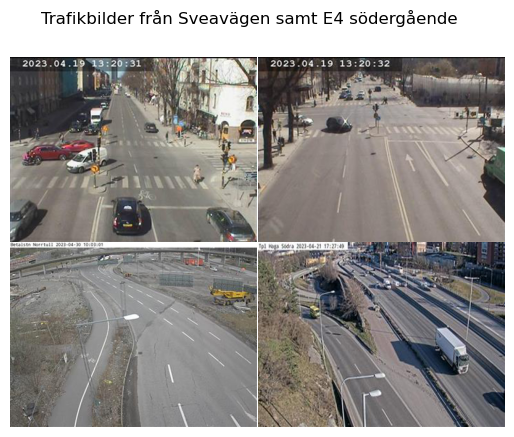

In [6]:
# Gör en plot med bilder från trafiken
fig, axs = plt.subplots(2, 2)
for ax, photo_url in zip(axs.flatten(), URLs):
    resource = urllib.request.urlopen(photo_url)
    img = Image.open(resource)
    img = img.resize((400, 300))
    ax.set_axis_off()
    ax.imshow(img)


plt.suptitle("Trafikbilder från Sveavägen samt E4 södergående")
#plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig("trafikinfo.png", bbox_inches="tight")
plt.show()
